## To - Do
- Double check solutions now are kinda as expected
- Boundary condition of outflow should be fixed (WIP)
- Naca profile should be implemented (Right now half a circle is possible)

# Navier-Stokes simulation in 2D
Currently only the simulation of a pressure driven lid is possible. This can be extended by adding more possibilities to the function 'set_BC'.

0
Iteration number: 1


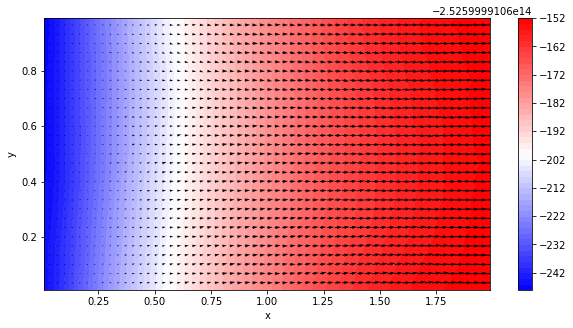

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Iteration number: 50

/home/student/Project_4_VH_TdK/functions.py:352: RuntimeWarning: overflow encountered in square
  return 1/2*(np.sum(np.sum(data.U**2)) + np.sum(np.sum(data.V**2)))
/home/student/Project_4_VH_TdK/simulation.py:66: RuntimeWarning: overflow encountered in multiply
  UVx = np.diff((Ua*Va - gamma*np.abs(Ua)*Vd), axis=0)/const.hx
/home/student/Project_4_VH_TdK/simulation.py:66: RuntimeWarning: invalid value encountered in subtract
  UVx = np.diff((Ua*Va - gamma*np.abs(Ua)*Vd), axis=0)/const.hx
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:1931: RuntimeWarning: invalid value encountered in subtract
  return a[slice1]-a[slice2]
/home/student/Project_4_VH_TdK/simulation.py:67: RuntimeWarning: overflow encountered in multiply
  UVy = np.diff((Ua*Va - gamma*Ud*np.abs(Va)), axis=1)/const.hy
/home/student/Project_4_VH_TdK/simulation.py:67: RuntimeWarning: invalid value encountered in subtract
  UVy = np.diff((Ua*Va - gamma*Ud*np.abs(Va)), axis=1)/const.hy
/home/student/Project_

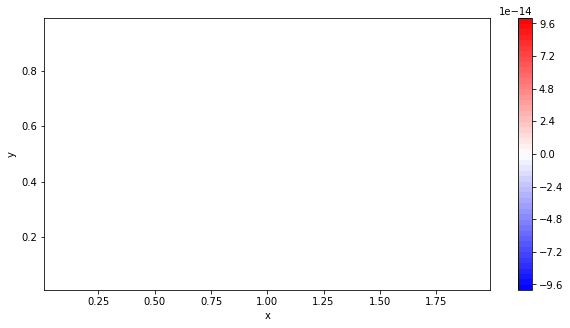

50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Iteration number: 100


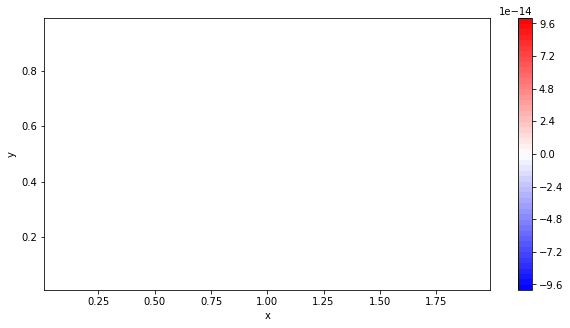

100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
Iteration number: 150


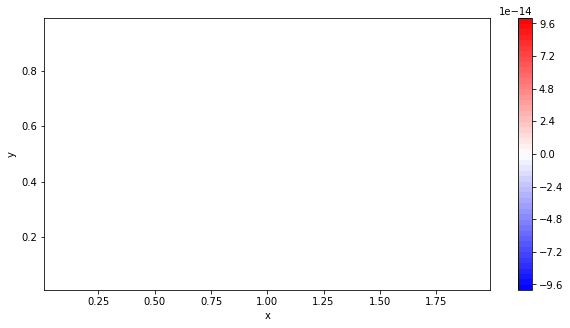

150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
Iteration number: 200


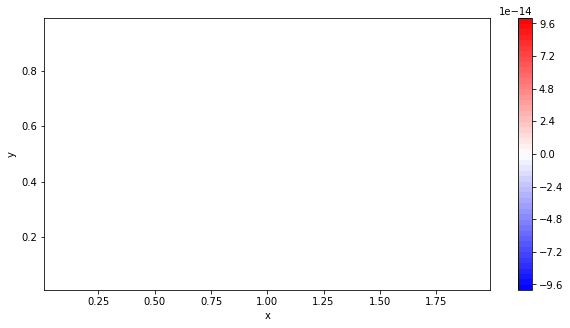

200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
Iteration number: 250


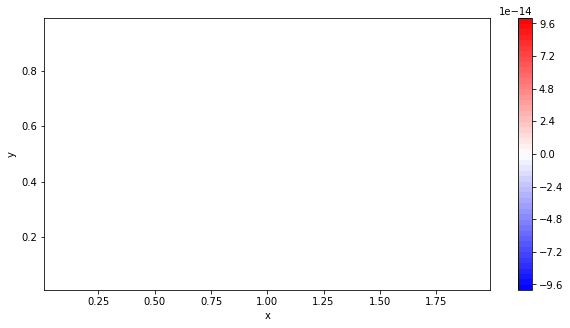

250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
Iteration number: 300


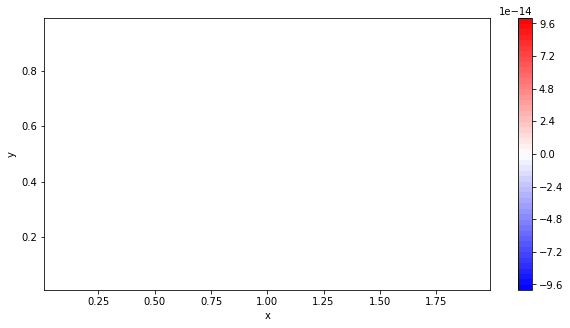

300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
Iteration number: 350


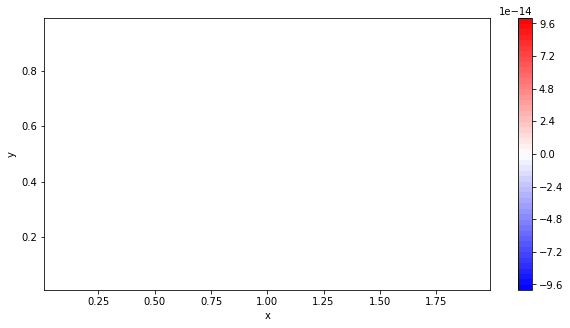

350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
Iteration number: 400


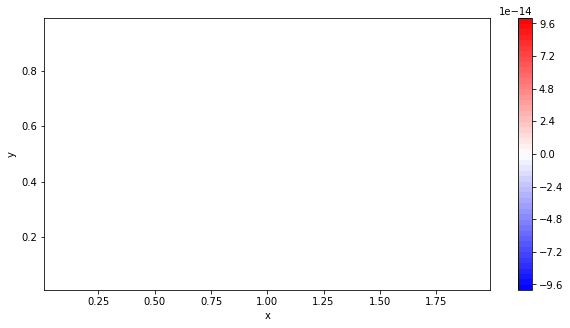

Iteration number: 400


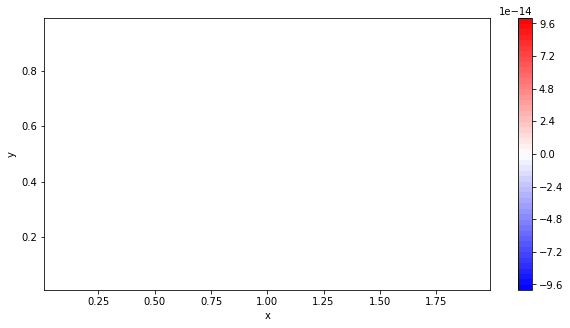

Maximum number of iterations (400) has been reached.
Runtime 6.01 s


In [3]:
#%matplotlib notebook
import time
import numpy as np
import scipy as sci
import math

from types import SimpleNamespace

from functions import *
from constants import *
from simulation import *

start_time = time.time()

# Initial conditions 
const = SimpleNamespace()

const.Re = 1e1      # Reynolds number
const.dt = 1e-2     # time step
const.tf = 4e0      # final time
const.nx = 120      # number of x-gridpoints
const.ny = 60       # number of y-gridpoints
const.nsteps = 50   # step interval for graphic output
const.lx = 2        # width of box
const.ly = 1        # height of box
const.cholesky = True
const.velocity = 1
    
const.rho_arrow = 40 # Density of arrows in quiver plot per unit length l

## Set other constants (incl. grid) which are determined by initial conditions specified above
const = constants(const)

# IC's
data = SimpleNamespace()
data = initialisation(const, data)

# BC's
## North, East, South, West
bc = SimpleNamespace()
boundary_type = 'horizontal_tube'
bc = set_BC(const, bc, boundary_type)

## Object 
obj = SimpleNamespace(sort = None)
obj = creat_obj(const, obj)

# Boundary matrices
bc = set_BM(const, bc) # Maybe change const. to bc.

# Operator matrices on P, U, V, Q respectively
LP = SimpleNamespace()
LP = laplacian(const, LP)
LP = laplace_obj(const, LP, obj)
if const.cholesky:
    LP = cholesky_decomposition(LP)

# Simulation
simulation_data = simulation(const, bc, obj, LP, data, boundary_type)

end_time = time.time()
print('Runtime', np.round(end_time - start_time,2), 's')

# Energy check

In [ ]:
#%matplotlib notebook
plt.plot(data.kin_energy)
plt.show()

# Preliminary object function

In [1]:
def laplace_obj(const, LP, obj):
    """WIP 
    Function expects object grids, and LP. Based on the grids LP gets modified
    such that nothing flows into the object or out of it. 
    """
    if obj.sort != None:
        lp_row = const.nx
        lq_row = const.nx-1
        lu_row = const.nx-1
        lv_row = const.nx 

        x_factor = (const.dt / const.Re)/const.hx**2
        y_factor = (const.dt / const.Re)/const.hy**2   

        # Object in Lp 
        for obj_col, obj_row in np.transpose(obj.coord_P):
            m_start = obj_row*lp_row

            obj_n = m_start+obj_col
            obj_m = m_start+obj_col
            
            ## Takes care of 0 seting in Laplace            
            LP.Lp[obj_n+1, obj_m] = 0
            LP.Lp[obj_n-1, obj_m] = 0            
            
            LP.Lp[obj_n, obj_m-1] = 0
            LP.Lp[obj_n, obj_m+1] = 0
            
            LP.Lp[obj_n, obj_m-lp_row] = 0
            LP.Lp[obj_n, obj_m+lp_row] = 0
            
            LP.Lp[obj_n-lp_row, obj_m] = 0
            LP.Lp[obj_n+lp_row, obj_m] = 0
            
            ## Make matrix again postitive definite 
            ## Horizontal neighbours  
            LP.Lp[obj_n-1, obj_m-1] = LP.Lp[obj_n-1, obj_m-1] - 1
            LP.Lp[obj_n+1, obj_m+1] = LP.Lp[obj_n+1, obj_m+1] - 1
            ## Vertical neighbours 
            LP.Lp[obj_n-lp_row, obj_m-lp_row] = LP.Lp[obj_n-lp_row, obj_m-lp_row] - 1
            LP.Lp[obj_n+lp_row, obj_m+lp_row] = LP.Lp[obj_n+lp_row, obj_m+lp_row] - 1 
            
        # Object in Lq
        for obj_col, obj_row in np.transpose(obj.coord_P):
            m_start = obj_row*lq_row

            obj_n = m_start+obj_col
            obj_m = m_start+obj_col
            
            ## Takes care of 0 seting in Laplace            
            LP.Lq[obj_n+1, obj_m] = 0
            LP.Lq[obj_n-1, obj_m] = 0            
            
            LP.Lq[obj_n, obj_m-1] = 0
            LP.Lq[obj_n, obj_m+1] = 0
            
            LP.Lq[obj_n, obj_m-lq_row] = 0
            LP.Lq[obj_n, obj_m+lq_row] = 0
            
            LP.Lq[obj_n-lq_row, obj_m] = 0
            LP.Lq[obj_n+lq_row, obj_m] = 0
            
            ## Make matrix again postitive definite 
            ## Horizontal neighbours  
            LP.Lq[obj_n-1, obj_m-1] = LP.Lq[obj_n-1, obj_m-1] - 1
            LP.Lq[obj_n+1, obj_m+1] = LP.Lq[obj_n+1, obj_m+1] - 1
            ## Vertical neighbours 
            LP.Lq[obj_n-lq_row, obj_m-lq_row] = LP.Lp[obj_n-lq_row, obj_m-lq_row] - 1
            LP.Lq[obj_n+lq_row, obj_m+lq_row] = LP.Lp[obj_n+lq_row, obj_m+lq_row] - 1    

        # Object in Lu
        for obj_col, obj_row in np.transpose(obj.coord_U):
            m_start = obj_row*lu_row

            obj_n = m_start+obj_col
            obj_m = m_start+obj_col
            
            ## Takes care of 0 seting in Laplace            
            LP.Lu[obj_n+1, obj_m] = 0
            LP.Lu[obj_n-1, obj_m] = 0            
            
            LP.Lu[obj_n, obj_m-1] = 0
            LP.Lu[obj_n, obj_m+1] = 0
            
            LP.Lu[obj_n, obj_m-lu_row] = 0
            LP.Lu[obj_n, obj_m+lu_row] = 0
            
            LP.Lu[obj_n-lu_row, obj_m] = 0
            LP.Lu[obj_n+lu_row, obj_m] = 0
            
            ## Make matrix again postitive definite 
            ## Horizontal neighbours 
            #LP.Lu[obj_n-1, obj_m-1] = LP.Lu[obj_n-1, obj_m-1] - x_factor
            #LP.Lu[obj_n+1, obj_m+1] = LP.Lu[obj_n+1, obj_m+1] - x_factor
            
            ## Vertical neighbours 
            #LP.Lu[obj_n-lu_row, obj_m-lu_row] = LP.Lu[obj_n-lu_row, obj_m-lu_row] - y_factor
            #LP.Lu[obj_n+lu_row, obj_m+lu_row] = LP.Lu[obj_n+lu_row, obj_m+lu_row] - y_factor  

        # Object in Lv
        for obj_col, obj_row in np.transpose(obj.coord_V):
            m_start = obj_row*lv_row

            obj_n = m_start+obj_col
            obj_m = m_start+obj_col
            
            ## Takes care of 0 seting in Laplace            
            LP.Lv[obj_n+1, obj_m] = 0
            LP.Lv[obj_n-1, obj_m] = 0            
            
            LP.Lv[obj_n, obj_m-1] = 0
            LP.Lv[obj_n, obj_m+1] = 0
            
            LP.Lv[obj_n, obj_m-lv_row] = 0
            LP.Lv[obj_n, obj_m+lv_row] = 0
            
            LP.Lv[obj_n-lv_row, obj_m] = 0
            LP.Lv[obj_n+lv_row, obj_m] = 0    
            
            ## Make matrix again postitive definite 
            ## Horizontal neighbours
            #LP.Lv[obj_n-1, obj_m-1] = LP.Lv[obj_n-1, obj_m-1] - x_factor
            #LP.Lv[obj_n+1, obj_m+1] = LP.Lv[obj_n+1, obj_m+1] - x_factor
            ## Vertical neighbours 
            #LP.Lv[obj_n-lv_row, obj_m-lv_row] = LP.Lv[obj_n-lv_row, obj_m-lv_row] - y_factor
            #LP.Lv[obj_n+lv_row, obj_m+lv_row] = LP.Lv[obj_n+lv_row, obj_m+lv_row] - y_factor
    
    return LP


In [2]:
def creat_obj(const, obj):
    
    if obj.sort == 'circle':
        # Circular object
        scale = 1/4
        factorxy = 1 #const.lx/const.ly # Now the object is not scaled with the box ratio
        R = const.lx*scale/4
        cx, cy = const.ly/2, const.ly/2

        # Object for a centered grid
        ## Should have shape (nx, ny)
        obj.cgrid = ((const.X_ave-cx)**2 + (factorxy*const.Y_ave-factorxy*cy)**2 <= R**2).T
    
    
    if obj.sort == 'hemicircle':
        scale = 1/2
        factorxy = 1 #const.lx/const.ly # Now the object is not scaled with the box ratio
        R= const.lx*scale/4 # Radius of object
        cx, cy = const.lx/2, const.ly/2 # Centre of object

        fraction = 1
        translation_c = R*(1-fraction)
        theta = 45
        theta = math.radians(theta)

        obj.cgrid = (((const.X_ave-cx)**2 + (factorxy*const.Y_ave-factorxy*cy)**2 <= R**2)*(-(const.Y_ave - (cy + translation_c))*math.tan(theta) <= const.X_ave - (cx + translation_c))).T
        
    
    if obj.sort != None:
        # Translate to P, U and V grid 
        obj.Pgrid = np.zeros((const.nx, const.ny), dtype=float)
        obj.Ugrid = np.zeros((const.nx-1, const.ny), dtype=float)
        obj.Vgrid = np.zeros((const.nx, const.ny-1), dtype=float)
        obj.Qgrid = np.zeros((const.nx-1, const.ny-1), dtype=float)

        # P can center grid have a one to one correspondance
        obj.Pgrid[:,:] = obj.cgrid
    
        # Q grid is a shifted by one P grid
        obj.Qgrid[:,:] = (obj.Pgrid[:-1,:-1] + np.roll(obj.Pgrid[:-1,:-1], -1, axis = 0)) > 0
        obj.Qgrid[:,:] = (obj.Qgrid[:,:] + \
                              np.roll(obj.Qgrid[:,:], -1, axis = 1)) > 0
        
        # Create a 1 layer mesh around the center grid in vertical direction
        obj.Ugrid[:,:] = (obj.Pgrid[:-1,:] + np.roll(obj.Pgrid[:-1,:], -1, axis = 0) ) > 0
        obj.Ugrid[:,:] = (obj.Ugrid[:,:] + \
                              np.roll(obj.Ugrid[:,:], -1, axis = 1) + \
                              np.roll(obj.Ugrid[:,:], 1, axis = 1)) > 0
        
        # Create a 1 layer mesh around the center grid in horizontal direction
        obj.Vgrid[:,:] = (obj.Pgrid[:,:-1] + np.roll(obj.Pgrid[:,:-1], -1, axis = 1) ) > 0
        obj.Vgrid[:,:] = (obj.Vgrid[:,:] + \
                              np.roll(obj.Vgrid[:,:], -1, axis = 0) + \
                              np.roll(obj.Vgrid[:,:], 1, axis = 0)) > 0
    
        # These need to have the form:
        # np.array([x-values], [y-values])
        # ex: np.array([3, 4, 5, 9], [1, 2, 9, 5])
        obj.coord_P = np.where(obj.Pgrid == np.max(obj.Pgrid))
        obj.coord_U = np.where(obj.Ugrid == np.max(obj.Ugrid))
        obj.coord_V = np.where(obj.Vgrid == np.max(obj.Vgrid))
        obj.coord_Q = np.where(obj.Qgrid == np.max(obj.Qgrid))
    
    return obj


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 0
xL = const.nx

y0 = 0
yL = const.ny

Obj = obj.Pgrid

u_x = np.arange(x0+1, xL, 1)
u_y = np.arange(y0+0.5, yL+0.5, 1)
[X_u, Y_u] = np.meshgrid(u_x, u_y)

v_x = np.arange(x0+0.5, xL+0.5, 1)
v_y = np.arange(y0+1, yL, 1)
[X_v, Y_v] = np.meshgrid(v_x, v_y)

p_x = np.arange(x0+0.5, xL + 0.5, 1)
p_y = np.arange(y0+0.5, yL + 0.5, 1)
[X_p, Y_p] = np.meshgrid(p_x, p_y)

my_dpi = 96
plt.figure(figsize=(xL*40/my_dpi, yL*40/my_dpi), dpi=my_dpi)
plt.plot(np.reshape(X_u, (-1,)), np.reshape(Y_u, (-1,)), 'x', label='U')
plt.plot(np.reshape(X_v, (-1,)), np.reshape(Y_v, (-1,)), '+', label='V')
plt.plot(np.reshape(X_p, (-1,)), np.reshape(Y_p, (-1,)), 'o', label='P')

plt.plot(obj.coord_P[0] + 0.5, obj.coord_P[1] + 0.5, 'or')
plt.plot(obj.coord_U[0] + 1, obj.coord_U[1] + 0.5, 'xr')
plt.plot(obj.coord_V[0] + 0.5, obj.coord_V[1] + 1, '+r')
plt.plot(obj.coord_Q[0] + 1, obj.coord_Q[1] + 1, 'ob')

plt.legend()
plt.imshow(Obj.T, extent=[x0, xL, y0, yL])
plt.tight_layout()
plt.show()

